In [1]:
import pandas as pd
import numpy as np
import os
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler

# https://dozee.herokuapp.com/

In [22]:
os.listdir()[21:34]

['sleep1.csv',
 'sleep10.csv',
 'sleep2.csv',
 'sleep3.csv',
 'sleep4.csv',
 'sleep5.csv',
 'sleep6.csv',
 'sleep7.csv',
 'sleep8.csv',
 'sleep9.csv']

#### Reading the created Csv files

In [23]:
df_final = pd.DataFrame()

In [24]:
for i in os.listdir()[21:34]:
    df = pd.read_csv(i)
    df["csv"]=i
    df_final=pd.concat([df,df_final],axis=0)

In [25]:
df_final.drop("Unnamed: 0",inplace=True,axis=1)

In [26]:
df_final.shape

(80, 18)

In [27]:
df_final.head()

,Mean_HR,Mean_BR,Max_HR,Max_BR,Min_HR,Min_BR,25_HR,25_BR,50_HR,50_BR,75_HR,75_BR,skew_HR,skew_BR,kurt_HR,kurt_BR,csv,window
0,78.432208,16.266750,104.83,25.82,47.89,8.39,69.9450,14.1075,80.295,15.910,87.3700,18.4000,-0.305788,0.113248,-0.497422,0.172372,sleep9.csv,0
1,80.706167,17.711500,97.48,30.24,54.71,9.75,75.0950,13.5175,82.260,14.685,88.2225,23.0275,-0.587716,0.807626,-0.438097,-0.894078,sleep9.csv,1
2,72.821125,18.893167,92.70,29.24,48.11,10.98,66.0500,12.8600,71.610,19.270,78.7250,24.5650,0.217541,0.040945,-0.283363,-1.694653,sleep9.csv,2
3,79.330750,15.641000,97.13,30.00,59.32,8.17,70.6475,12.9425,80.025,13.500,86.9900,15.0850,-0.055713,1.289864,-1.080146,0.455204,sleep9.csv,3
4,81.071083,17.575250,100.23,28.20,56.48,2.35,75.2875,12.9675,82.500,16.090,87.9700,22.4900,-0.389509,0.144126,-0.529080,-0.985482,sleep9.csv,4


In [28]:
df_final=df_final.reset_index()
df_final=df_final.drop("index",axis=1)
df_final1=df_final.drop(["csv","window"],axis=1)

In [37]:
df_final1.head()

,Mean_HR,Mean_BR,Max_HR,Max_BR,Min_HR,Min_BR,25_HR,25_BR,50_HR,50_BR,75_HR,75_BR,skew_HR,skew_BR,kurt_HR,kurt_BR,labels
0,78.432208,16.266750,104.83,25.82,47.89,8.39,69.9450,14.1075,80.295,15.910,87.3700,18.4000,-0.305788,0.113248,-0.497422,0.172372,0
1,80.706167,17.711500,97.48,30.24,54.71,9.75,75.0950,13.5175,82.260,14.685,88.2225,23.0275,-0.587716,0.807626,-0.438097,-0.894078,0
2,72.821125,18.893167,92.70,29.24,48.11,10.98,66.0500,12.8600,71.610,19.270,78.7250,24.5650,0.217541,0.040945,-0.283363,-1.694653,0
3,79.330750,15.641000,97.13,30.00,59.32,8.17,70.6475,12.9425,80.025,13.500,86.9900,15.0850,-0.055713,1.289864,-1.080146,0.455204,0
4,81.071083,17.575250,100.23,28.20,56.48,2.35,75.2875,12.9675,82.500,16.090,87.9700,22.4900,-0.389509,0.144126,-0.529080,-0.985482,0


#### Using K means Clustering to create Classes

In [55]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_final1)

Text(0, 0.5, 'Inertia')

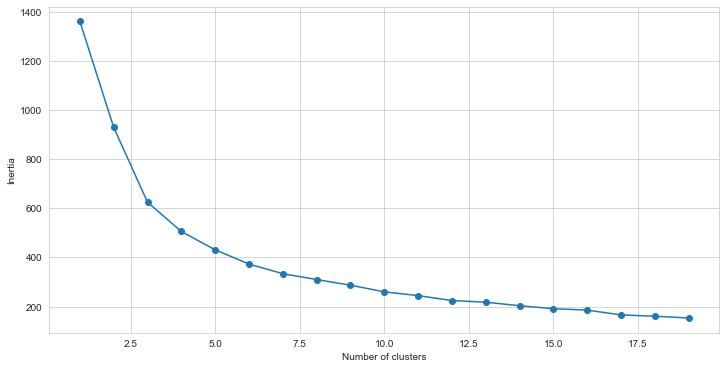

In [56]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [57]:
kmeans = KMeans(n_clusters=4 ,init='k-means++')
kmeans.fit(data_scaled)
kmeans.inertia_

505.42152003698897

In [58]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 3, 3, 3, 3, 3, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [59]:
df_final1["labels"]=kmeans.labels_

In [60]:
df_final1.head()

,Mean_HR,Mean_BR,Max_HR,Max_BR,Min_HR,Min_BR,25_HR,25_BR,50_HR,50_BR,75_HR,75_BR,skew_HR,skew_BR,kurt_HR,kurt_BR,labels
0,78.432208,16.266750,104.83,25.82,47.89,8.39,69.9450,14.1075,80.295,15.910,87.3700,18.4000,-0.305788,0.113248,-0.497422,0.172372,0
1,80.706167,17.711500,97.48,30.24,54.71,9.75,75.0950,13.5175,82.260,14.685,88.2225,23.0275,-0.587716,0.807626,-0.438097,-0.894078,0
2,72.821125,18.893167,92.70,29.24,48.11,10.98,66.0500,12.8600,71.610,19.270,78.7250,24.5650,0.217541,0.040945,-0.283363,-1.694653,0
3,79.330750,15.641000,97.13,30.00,59.32,8.17,70.6475,12.9425,80.025,13.500,86.9900,15.0850,-0.055713,1.289864,-1.080146,0.455204,0
4,81.071083,17.575250,100.23,28.20,56.48,2.35,75.2875,12.9675,82.500,16.090,87.9700,22.4900,-0.389509,0.144126,-0.529080,-0.985482,0


#### Visualzing each cluster feature wise

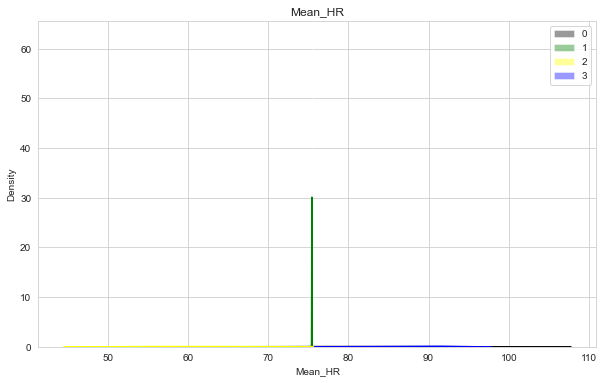

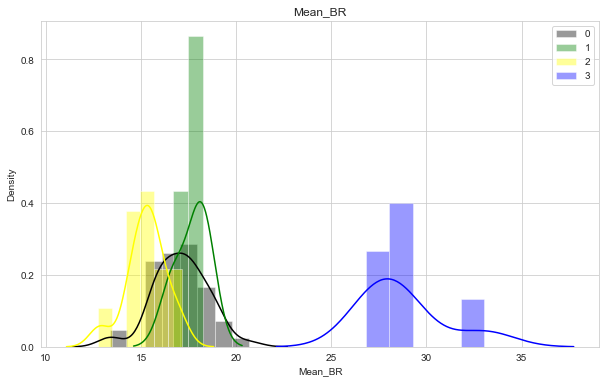

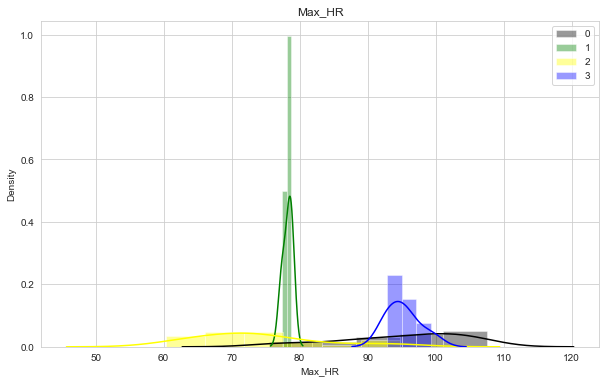

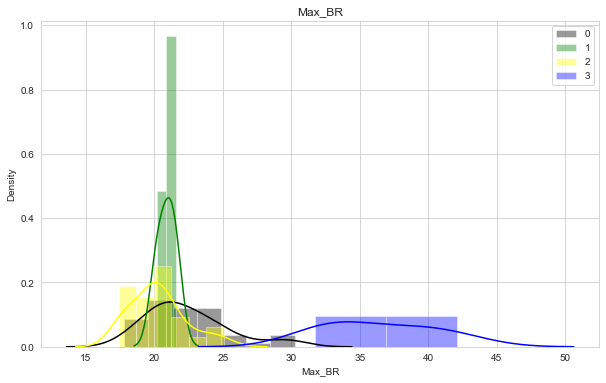

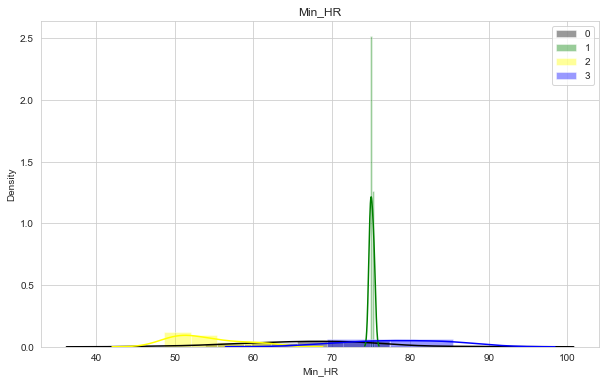

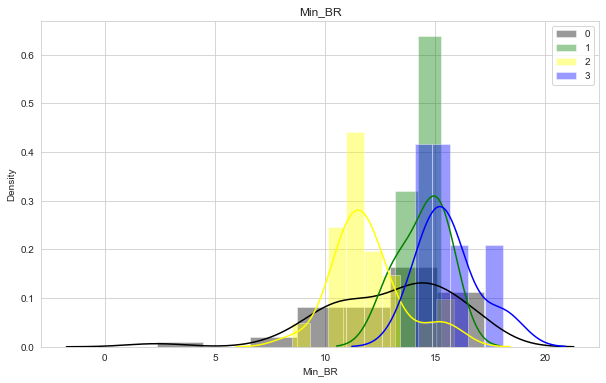

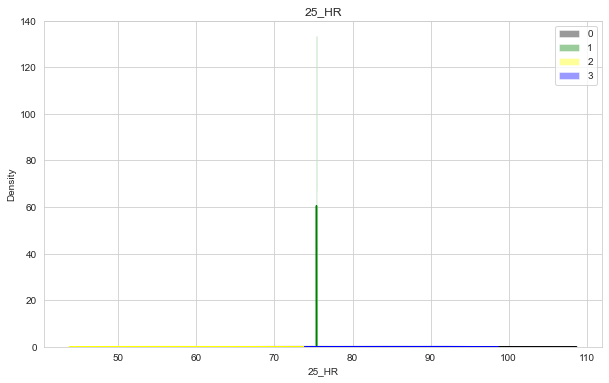

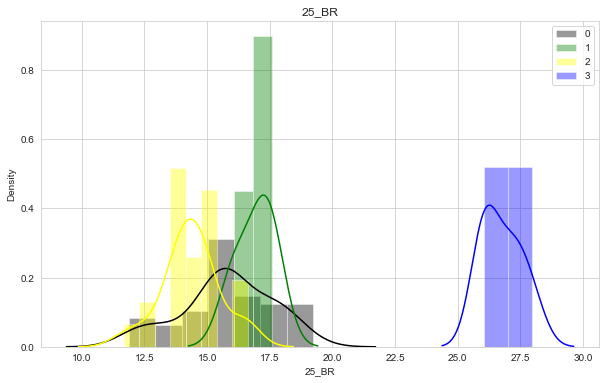

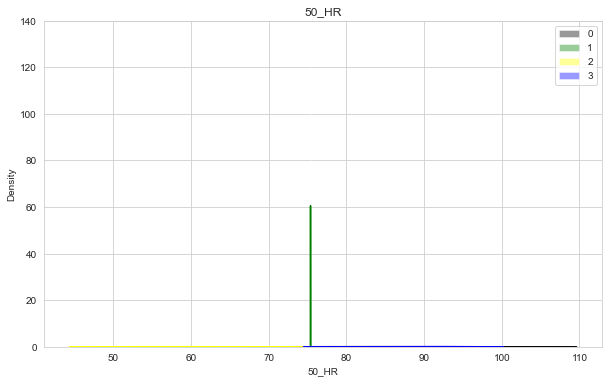

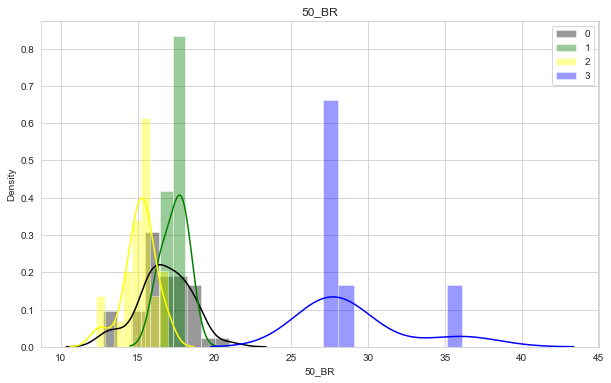

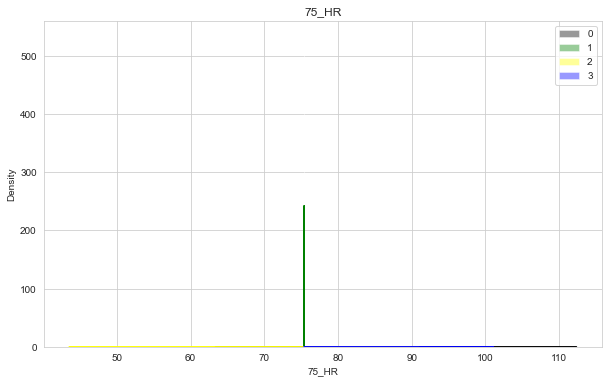

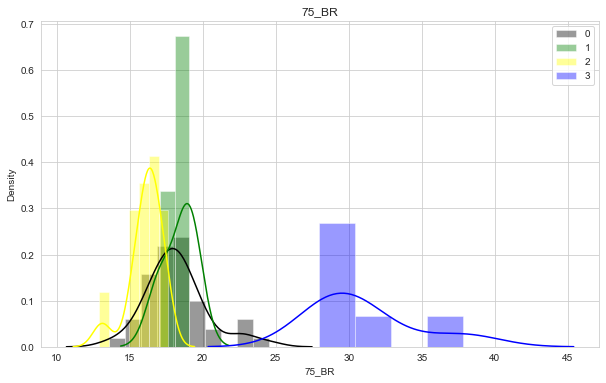

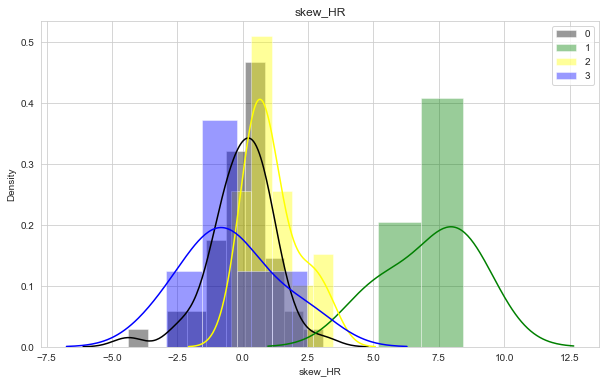

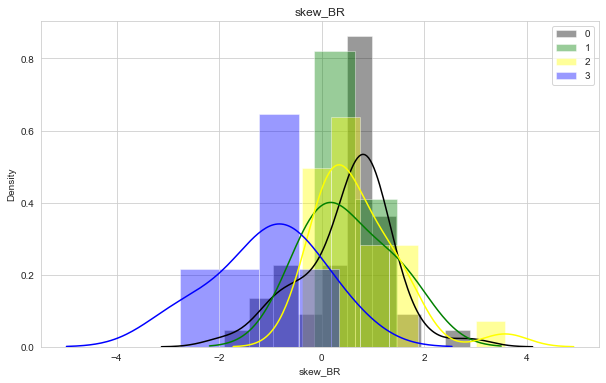

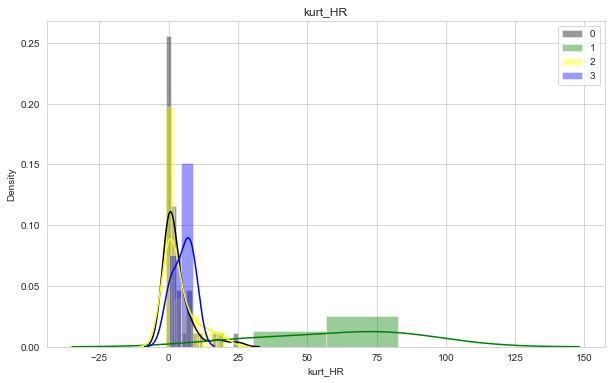

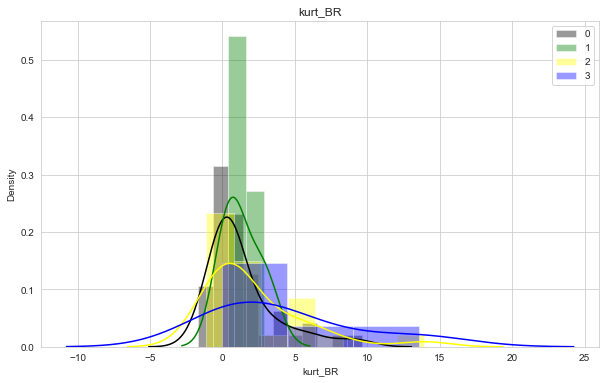

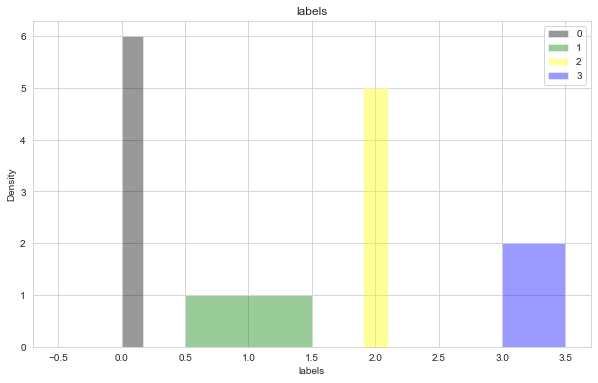

In [62]:
sns.set_style("whitegrid")

for i in df_final1.columns[0:len(df_final1.columns)]:
    plt.figure(figsize=(10,6))
    plt.title(i)
    sns.distplot(df_final1[df_final1['labels'] == 0][i][0:] , label = "0" ,color = 'black' )
    sns.distplot(df_final1[df_final1['labels'] == 1][i][0:] , label = "1", color = 'green' )
    sns.distplot(df_final1[df_final1['labels'] == 2][i][0:] , label = "2", color = 'yellow' )
    sns.distplot(df_final1[df_final1['labels'] == 3][i][0:] , label = "3", color = 'blue' )
    
    plt.legend()
    q = i+".png"
    plt.savefig(q)
    plt.show()

In [543]:
df_final1["csv"]=df_final["csv"]
df_final1["window"]=df_final["window"]


#### If you want to visualize each window assocaited with the cluster, that can be done using the web app.(https://dozee.herokuapp.com/)

### Around 40–50 HR is common and is considered normal
### Around 12-18 BR is common and is considered normal

### Cluster 0 Analysis

In [67]:
df_final[df_final1["labels"]==0]

,Mean_HR,Mean_BR,Max_HR,Max_BR,Min_HR,Min_BR,25_HR,25_BR,50_HR,50_BR,75_HR,75_BR,skew_HR,skew_BR,kurt_HR,kurt_BR,csv,window
0,78.432208,16.266750,104.83,25.82,47.89,8.39,69.9450,14.1075,80.295,15.910,87.3700,18.4000,-0.305788,0.113248,-0.497422,0.172372,sleep9.csv,0
1,80.706167,17.711500,97.48,30.24,54.71,9.75,75.0950,13.5175,82.260,14.685,88.2225,23.0275,-0.587716,0.807626,-0.438097,-0.894078,sleep9.csv,1
2,72.821125,18.893167,92.70,29.24,48.11,10.98,66.0500,12.8600,71.610,19.270,78.7250,24.5650,0.217541,0.040945,-0.283363,-1.694653,sleep9.csv,2
3,79.330750,15.641000,97.13,30.00,59.32,8.17,70.6475,12.9425,80.025,13.500,86.9900,15.0850,-0.055713,1.289864,-1.080146,0.455204,sleep9.csv,3
4,81.071083,17.575250,100.23,28.20,56.48,2.35,75.2875,12.9675,82.500,16.090,87.9700,22.4900,-0.389509,0.144126,-0.529080,-0.985482,sleep9.csv,4
5,75.976458,15.688833,105.80,26.18,57.62,10.11,66.6250,11.8925,72.115,13.315,84.3700,17.0900,0.835493,1.057572,-0.338793,-0.544117,sleep9.csv,5
7,80.210833,13.375583,99.31,23.66,55.80,10.13,75.3025,12.2400,80.845,12.750,86.5725,13.6050,-0.578364,2.889719,0.043016,9.654343,sleep9.csv,7
16,75.391000,17.787417,75.47,20.46,75.34,16.57,75.3800,17.3200,75.390,17.750,75.4000,18.2000,1.337102,0.819282,10.798413,1.548087,sleep7.csv,1
18,75.609667,17.447333,79.32,21.10,72.40,13.43,75.3600,17.0325,75.380,17.730,75.4400,18.4300,1.901059,-1.125152,8.738428,1.051077,sleep7.csv,3
19,75.365917,17.213500,77.28,20.55,72.34,15.72,75.3700,16.2625,75.390,17.110,75.4125,17.6425,-1.189176,0.840396,6.734654,0.318399,sleep7.csv,4


In [68]:
print("mean_HR",df_final[df_final1["labels"]==0]["Mean_HR"].mean())
print("mean_BR",df_final[df_final1["labels"]==0]["Mean_BR"].mean())
print("mean_std_HR",df_final[df_final1["labels"]==0]["Mean_HR"].std())
print("mean_std_BR",df_final[df_final1["labels"]==0]["Mean_BR"].std())
print("mean_skew_HR",df_final[df_final1["labels"]==0]["skew_HR"].mean())
print("mean_skew_BR",df_final[df_final1["labels"]==0]["skew_BR"].mean())
print("mean_kurt_HR",df_final[df_final1["labels"]==0]["kurt_HR"].mean())
print("mean_kurt_BR",df_final[df_final1["labels"]==0]["kurt_BR"].mean())

mean_HR 81.55525810934785
mean_BR 17.08722409173913
mean_std_HR 6.3500787187975485
mean_std_BR 1.4291426912080702
mean_skew_HR -0.02562587954347827
mean_skew_BR 0.5005588868260871
mean_kurt_HR 2.989339843652173
mean_kurt_BR 1.3552699171304352


## Cluster 1 Analysis

In [75]:
df_final[df_final1["labels"]==1]

,Mean_HR,Mean_BR,Max_HR,Max_BR,Min_HR,Min_BR,25_HR,25_BR,50_HR,50_BR,75_HR,75_BR,skew_HR,skew_BR,kurt_HR,kurt_BR,csv,window
15,75.455250,18.141833,77.43,21.55,75.36,13.19,75.38,17.155,75.39,17.63,75.4000,19.08,5.176742,0.261018,30.605411,0.385157,sleep7.csv,0
17,75.458583,18.235417,78.77,20.95,75.04,14.87,75.39,17.575,75.40,18.09,75.4025,19.02,7.901204,-0.157410,70.432626,0.764214,sleep7.csv,2
20,75.437250,16.693833,78.52,20.17,74.83,15.28,75.38,16.090,75.39,16.49,75.4000,17.10,8.444008,1.467798,82.623810,2.847228,sleep7.csv,5


In [76]:
print("mean_HR",df_final[df_final1["labels"]==1]["Mean_HR"].mean())
print("mean_BR",df_final[df_final1["labels"]==1]["Mean_BR"].mean())
print("mean_std_HR",df_final[df_final1["labels"]==1]["Mean_HR"].std())
print("mean_std_BR",df_final[df_final1["labels"]==1]["Mean_BR"].std())
print("mean_skew_HR",df_final[df_final1["labels"]==1]["skew_HR"].mean())
print("mean_skew_BR",df_final[df_final1["labels"]==1]["skew_BR"].mean())
print("mean_kurt_HR",df_final[df_final1["labels"]==1]["kurt_HR"].mean())
print("mean_kurt_BR",df_final[df_final1["labels"]==1]["kurt_BR"].mean())

mean_HR 75.45036111
mean_BR 17.69036111
mean_std_HR 0.011476222213612951
mean_std_BR 0.8642859322094656
mean_skew_HR 7.173984663333333
mean_skew_BR 0.5238021313333333
mean_kurt_HR 61.220615656666666
mean_kurt_BR 1.3321998659999998


Mean_HR is of Cluster1 is 60 with 5 std which is optimal
Mean_BR is of Cluster1 is 15 with 0.9 std which is optimal
Also, if you see the graph and trend lines for the windows(using web app) in this cluster then you see the pattern is quite stable fror Both HR and BR.
Hence, Cluster1 : Rank 1

## Cluster 2 Analysis

In [77]:
df_final[df_final1["labels"]==2]

,Mean_HR,Mean_BR,Max_HR,Max_BR,Min_HR,Min_BR,25_HR,25_BR,50_HR,50_BR,75_HR,75_BR,skew_HR,skew_BR,kurt_HR,kurt_BR,csv,window
6,70.513083,12.735583,94.78,25.08,52.05,8.52,63.0000,11.6750,68.095,12.280,75.4275,12.9225,0.710788,3.572675,-0.236464,13.944258,sleep9.csv,6
8,73.704659,12.979886,93.85,18.09,55.17,10.33,65.8875,12.3175,72.710,12.825,79.9975,13.3275,0.303199,1.769561,-0.675942,5.833789,sleep9.csv,8
30,69.278083,15.389917,79.65,21.58,61.52,11.07,67.4000,14.1025,68.995,15.455,71.1675,16.5375,0.459088,0.289544,1.117029,0.515220,sleep6.csv,7
31,65.275000,15.173333,69.37,19.82,59.10,11.36,63.7275,13.7575,65.220,14.750,67.2925,17.2500,-0.463065,0.220462,-0.297237,-0.615596,sleep6.csv,8
35,69.167083,16.961917,84.21,21.16,61.36,14.78,67.4350,16.4900,69.115,16.820,70.4700,17.2600,1.062289,1.676343,5.231587,5.479510,sleep5.csv,3
36,69.382833,17.166333,90.34,20.36,58.76,15.32,66.7975,16.6275,68.230,16.970,70.6025,17.3400,2.352623,1.564810,7.720411,2.404226,sleep5.csv,4
37,67.594750,16.578750,81.82,17.60,62.26,15.86,65.9875,16.2700,67.170,16.520,68.3050,16.7700,2.491675,0.704127,10.760446,0.225013,sleep5.csv,5
52,66.017125,15.446250,76.80,20.27,52.66,11.58,63.6025,15.1400,65.675,15.285,68.4925,16.3000,-0.058958,-0.385743,0.187323,1.033895,sleep2.csv,0
53,63.031250,15.733667,72.91,20.24,57.76,13.32,60.8450,14.8925,62.185,15.665,64.4250,16.3225,1.172785,1.066000,1.293737,2.228152,sleep2.csv,1
54,62.479542,16.011750,69.70,20.41,55.37,12.92,61.1175,14.7875,62.200,16.035,63.2550,17.3800,0.659381,0.147231,1.177645,-0.363093,sleep2.csv,2


In [78]:
print("mean_HR",df_final[df_final1["labels"]==2]["Mean_HR"].mean())
print("mean_BR",df_final[df_final1["labels"]==2]["Mean_BR"].mean())
print("mean_std_HR",df_final[df_final1["labels"]==2]["Mean_HR"].std())
print("mean_std_BR",df_final[df_final1["labels"]==2]["Mean_BR"].std())
print("mean_skew_HR",df_final[df_final1["labels"]==2]["skew_HR"].mean())
print("mean_skew_BR",df_final[df_final1["labels"]==2]["skew_BR"].mean())
print("mean_kurt_HR",df_final[df_final1["labels"]==2]["kurt_HR"].mean())
print("mean_kurt_BR",df_final[df_final1["labels"]==2]["kurt_BR"].mean())

mean_HR 61.319804696
mean_BR 15.2809087876
mean_std_HR 6.059114505052061
mean_std_BR 1.048315402987635
mean_skew_HR 1.1278454258400001
mean_skew_BR 0.7105730962800001
mean_kurt_HR 3.82209082208
mean_kurt_BR 2.1846677602799995


Mean_HR is of Cluster2 is 88 with +/- 3std which is very high
Mean_BR is of Cluster2 is 28 with +/- 2.23std which is very high
Also, if you see the graph and trend lines for the windows(using web app) in this cluster then you see the pattern is quite unstable fror Both HR and BR.
Hence, Cluster2 : Rank 4

## Cluster 3 Analysis

In [73]:
df_final[df_final1["labels"]==3]

,Mean_HR,Mean_BR,Max_HR,Max_BR,Min_HR,Min_BR,25_HR,25_BR,50_HR,50_BR,75_HR,75_BR,skew_HR,skew_BR,kurt_HR,kurt_BR,csv,window
9,86.475792,33.053583,92.82,42.13,74.86,14.07,85.1375,27.9600,87.330,36.120,88.7250,37.8525,-1.260500,-0.921674,1.627542,-0.062925,sleep8.csv,0
10,82.575667,26.801417,92.90,31.71,80.07,15.58,81.3675,26.0825,82.155,27.065,83.0200,27.9375,2.460587,-2.769946,8.884312,13.546438,sleep8.csv,1
11,89.628750,28.098333,96.37,34.05,84.75,18.07,89.0000,27.0175,89.685,28.025,90.2900,29.3875,0.537014,-0.786821,6.266792,3.366506,sleep8.csv,2
12,90.571583,28.805667,94.67,39.74,85.47,15.17,89.4525,26.1525,90.755,27.385,91.7850,31.8450,-0.508039,0.330910,0.078322,0.614549,sleep8.csv,3
13,89.870083,28.603500,99.36,33.33,76.37,14.87,88.6450,27.3200,90.230,28.570,91.1300,30.1725,-1.082282,-1.684119,5.313558,6.342029,sleep8.csv,4
14,90.986905,27.253214,95.26,37.50,69.39,15.92,91.1750,26.0400,92.530,27.535,93.4675,28.8300,-2.922319,-0.604081,8.790871,1.612989,sleep8.csv,5


In [74]:
print("mean_HR",df_final[df_final1["labels"]==3]["Mean_HR"].mean())
print("mean_BR",df_final[df_final1["labels"]==3]["Mean_BR"].mean())
print("mean_std_HR",df_final[df_final1["labels"]==3]["Mean_HR"].std())
print("mean_std_BR",df_final[df_final1["labels"]==3]["Mean_BR"].std())
print("mean_skew_HR",df_final[df_final1["labels"]==3]["skew_HR"].mean())
print("mean_skew_BR",df_final[df_final1["labels"]==3]["skew_BR"].mean())
print("mean_kurt_HR",df_final[df_final1["labels"]==3]["kurt_HR"].mean())
print("mean_kurt_BR",df_final[df_final1["labels"]==3]["kurt_BR"].mean())

mean_HR 88.35146329333334
mean_BR 28.769285715
mean_std_HR 3.24623238604122
mean_std_BR 2.236299299198899
mean_skew_HR -0.46258967633333326
mean_skew_BR -1.0726219508333334
mean_kurt_HR 5.1602329175
mean_kurt_BR 4.236597581333334
